In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

Preprocesado

Este algoritmo mide distancias, y como tal debe tenerse en cuenta. Por eso, es importante normalizar los datos, como sudecía con kmeans.

In [3]:
from sklearn import preprocessing

X_scaled = preprocessing.normalize(X)

## Standardize features: mean = 0, std = 1
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

Con spicy

In [4]:
#Condensed distance matrix
row_clusters = linkage(pdist(X_scaled, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['índice 1', 'índice 2',
                      'distancia', '| nuevo cluster |'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,índice 1,índice 2,distancia,| nuevo cluster |
cluster 1,101.0,142.0,0.000000,2.0
cluster 2,102.0,111.0,0.001901,2.0
cluster 3,0.0,10.0,0.003276,2.0
cluster 4,50.0,74.0,0.003884,2.0
cluster 5,65.0,71.0,0.004249,2.0
...,...,...,...,...
cluster 145,289.0,290.0,0.155333,49.0
cluster 146,291.0,293.0,0.193055,74.0
cluster 147,41.0,294.0,0.205290,50.0
cluster 148,292.0,295.0,0.241698,100.0


Visualizamos el dendograma

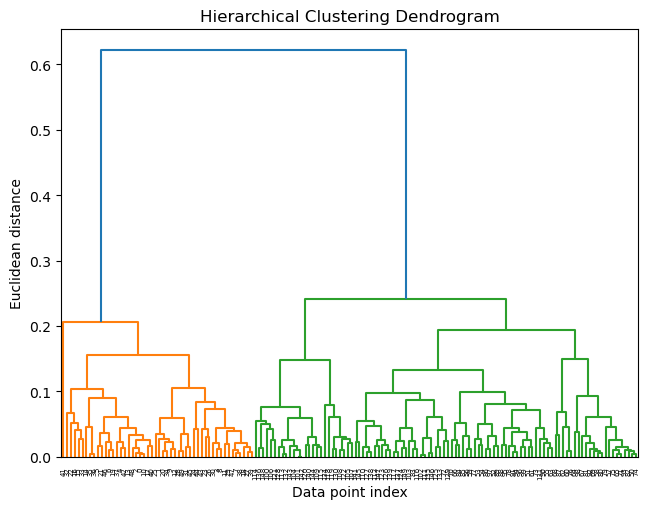

In [5]:
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Euclidean distance')
plt.show()

In [6]:
labels_scipy = fcluster(row_clusters, t=3, criterion='maxclust')

# Compare with true species labels
pd.crosstab(labels_scipy, y, rownames=['Cluster'], colnames=['True Label'])

True Label,0,1,2
Cluster,,,
1,50,0,0
2,0,0,26
3,0,50,24


Con scikit-learn

In [7]:
from sklearn.cluster import AgglomerativeClustering

# Build the model
model = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',   # distance metric
    linkage='complete'      # same criterion as in SciPy
)

# Fit and get cluster labels
labels_sklearn = model.fit_predict(X_scaled)

# Compare results
pd.crosstab(labels_sklearn, y, rownames=['Cluster'], colnames=['True Label'])

True Label,0,1,2
Cluster,,,
0,50,0,0
1,0,50,24
2,0,0,26
